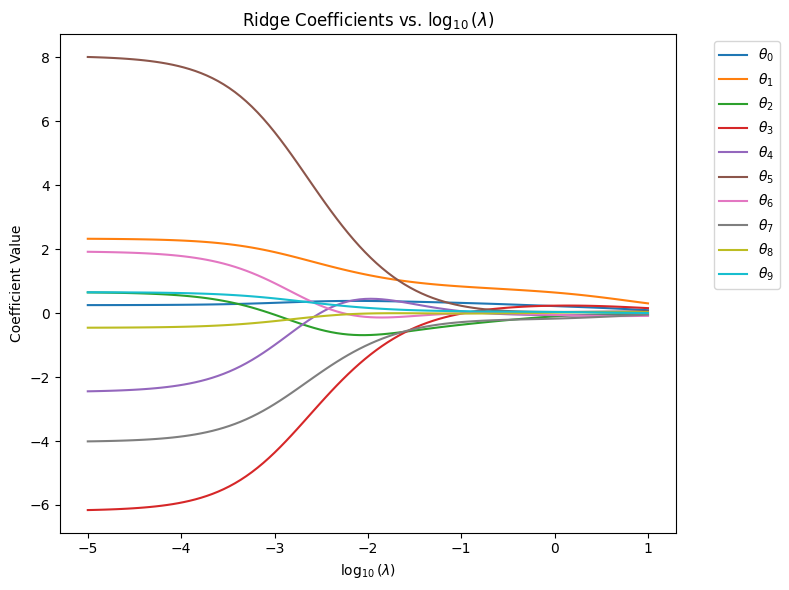

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load and subsample dataset
housing = fetch_california_housing()
x = housing.data[:, 0]
y = housing.target
np.random.seed(45)  # Do not change it
idx = np.random.choice(len(x), 20, replace=False)
x = x[idx]
y = y[idx]
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

# Design matrix for polynomial features (degree 9)
degree = 9
Phi = np.column_stack([x**i for i in range(degree+1)])

# Use a finer grid of lambda values for a smoother plot
lams = np.logspace(-5, 1, 100)

# Compute the ridge coefficients for each lambda value
thetas = []
d = Phi.shape[1]
I = np.eye(d)
for lam in lams:
    theta = np.linalg.inv(Phi.T @ Phi + lam * I) @ (Phi.T @ y)
    thetas.append(theta)

thetas = np.array(thetas)

# Plot each coefficient vs. log10(lambda)
plt.figure(figsize=(8, 6))
for i in range(d):
    plt.plot(np.log10(lams), thetas[:, i], label=f"$\\theta_{i}$")

plt.xlabel("$\\log_{10}(\\lambda)$")
plt.ylabel("Coefficient Value")
plt.title("Ridge Coefficients vs. $\\log_{10}(\\lambda)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
